**Reconnaissance de visages — à exécuter avant la cellule de test :** définir `image_paths` (liste des chemins d'images).

In [5]:
# Construire la liste des chemins d'images (à exécuter avant le test avec SEUIL_CONFIANCE / nb_test)
import os
import glob

# Dossier de base : un sous-dossier par personne, chaque sous-dossier contient des images
DATA_DIR = "dataset"   # à adapter : chemin vers tes dossiers de visages (ex. "faces", "dataset")
image_paths = []
for ext in ["*.jpg", "*.jpeg", "*.png"]:
    image_paths.extend(glob.glob(os.path.join(DATA_DIR, "*", ext)))

# Si tes images sont dans un seul dossier (sans sous-dossiers par personne) :
# image_paths = glob.glob(os.path.join(DATA_DIR, "*.*"))

print("Nombre d'images trouvées:", len(image_paths))
if len(image_paths) > 0:
    print("Exemple:", image_paths[0])

Nombre d'images trouvées: 0


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("osteoporosis.csv")

In [50]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,0
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [9]:
df.describe()

,Id,Age,Osteoporosis
count,1.958000e+03,1958.000000,1958.000000
mean,1.549929e+06,39.101124,0.500000
std,2.614250e+05,21.355424,0.500128
min,1.100064e+06,18.000000,0.000000
25%,1.319163e+06,21.000000,0.000000
50%,1.546028e+06,32.000000,0.500000
75%,1.775870e+06,53.000000,1.000000
max,1.999676e+06,90.000000,1.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [52]:
df.shape
df.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [53]:
df["Osteoporosis"].value_counts()

Osteoporosis
0    1114
1     844
Name: count, dtype: int64

In [54]:
df.dtypes
df.nunique()

Id                     1958
Age                      73
Gender                    2
Hormonal Changes          2
Family History            2
Race/Ethnicity            3
Body Weight               2
Calcium Intake            2
Vitamin D Intake          2
Physical Activity         2
Smoking                   2
Alcohol Consumption       1
Medical Conditions        2
Medications               1
Prior Fractures           2
Osteoporosis              2
dtype: int64

## Visualisations

C:\Users\DEBUZE DAVID\AppData\Local\Temp\ipykernel_7972\1483617499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Osteoporosis", palette="Set2")


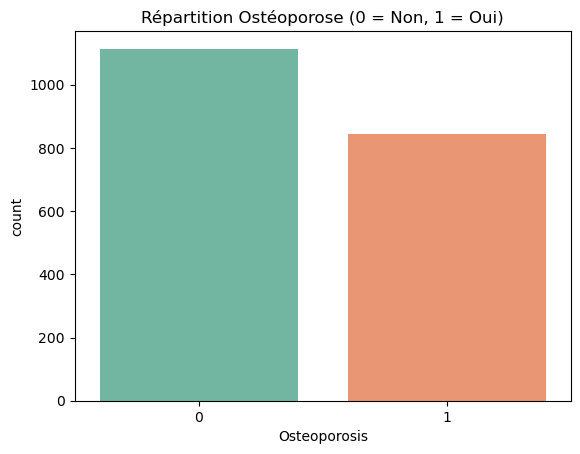

In [55]:
# 1. Répartition de la cible (Osteoporosis)
sns.countplot(data=df, x="Osteoporosis", palette="Set2")
plt.title("Répartition Ostéoporose (0 = Non, 1 = Oui)")
plt.xlabel("Osteoporosis")
plt.show()

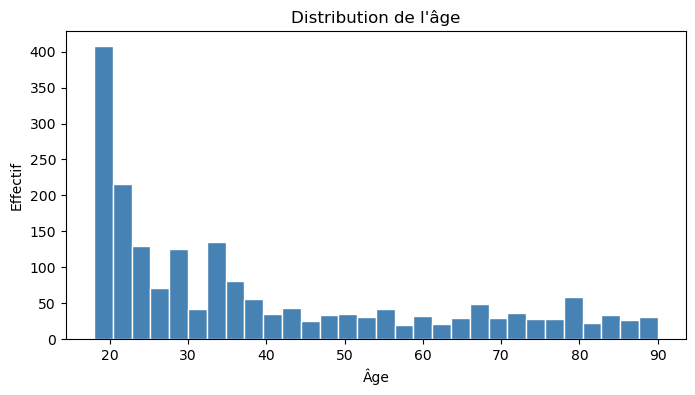

In [56]:
# 2. Distribution de l'âge
plt.figure(figsize=(8, 4))
plt.hist(df["Age"], bins=30, color="steelblue", edgecolor="white")
plt.title("Distribution de l'âge")
plt.xlabel("Âge")
plt.ylabel("Effectif")
plt.show()

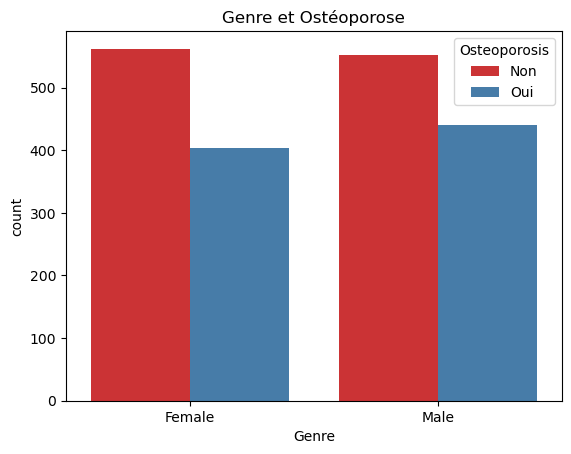

In [57]:
# 3. Genre vs Osteoporosis
sns.countplot(data=df, x="Gender", hue="Osteoporosis", palette="Set1")
plt.title("Genre et Ostéoporose")
plt.xlabel("Genre")
plt.legend(title="Osteoporosis", labels=["Non", "Oui"])
plt.show()

C:\Users\DEBUZE DAVID\AppData\Local\Temp\ipykernel_7972\4126579754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Osteoporosis", y="Age", palette="Pastel1")


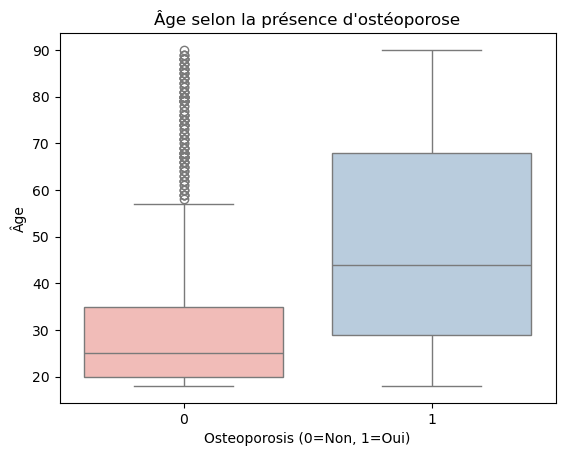

In [58]:
# 4. Âge selon Osteoporosis (boxplot)
sns.boxplot(data=df, x="Osteoporosis", y="Age", palette="Pastel1")
plt.title("Âge selon la présence d'ostéoporose")
plt.xlabel("Osteoporosis (0=Non, 1=Oui)")
plt.ylabel("Âge")
plt.show()

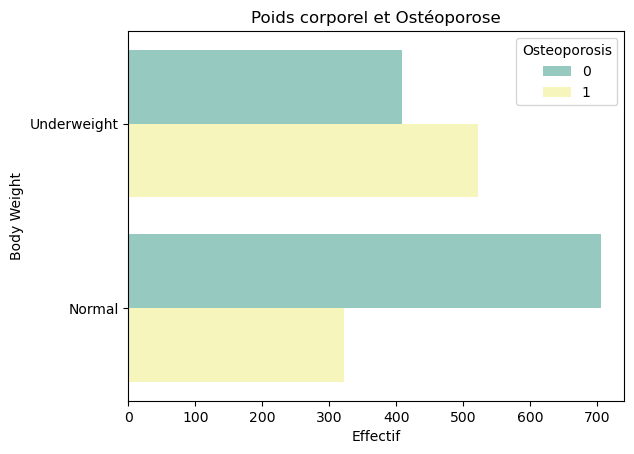

In [59]:
# 5. Poids corporel vs Osteoporosis
sns.countplot(data=df, y="Body Weight", hue="Osteoporosis", palette="Set3")
plt.title("Poids corporel et Ostéoporose")
plt.xlabel("Effectif")
plt.show()

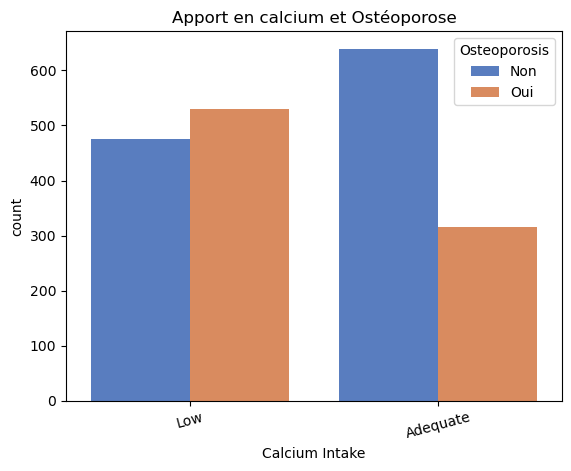

In [60]:
# 6. Apport en calcium vs Osteoporosis
sns.countplot(data=df, x="Calcium Intake", hue="Osteoporosis", palette="muted")
plt.title("Apport en calcium et Ostéoporose")
plt.xlabel("Calcium Intake")
plt.xticks(rotation=15)
plt.legend(title="Osteoporosis", labels=["Non", "Oui"])
plt.show()

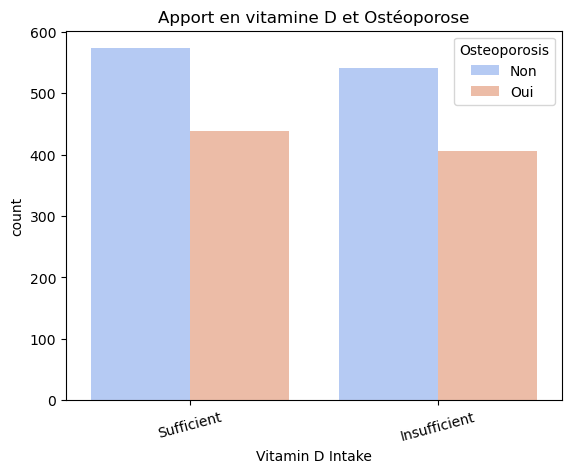

In [61]:
# 7. Vitamine D vs Osteoporosis
sns.countplot(data=df, x="Vitamin D Intake", hue="Osteoporosis", palette="coolwarm")
plt.title("Apport en vitamine D et Ostéoporose")
plt.xlabel("Vitamin D Intake")
plt.xticks(rotation=15)
plt.legend(title="Osteoporosis", labels=["Non", "Oui"])
plt.show()

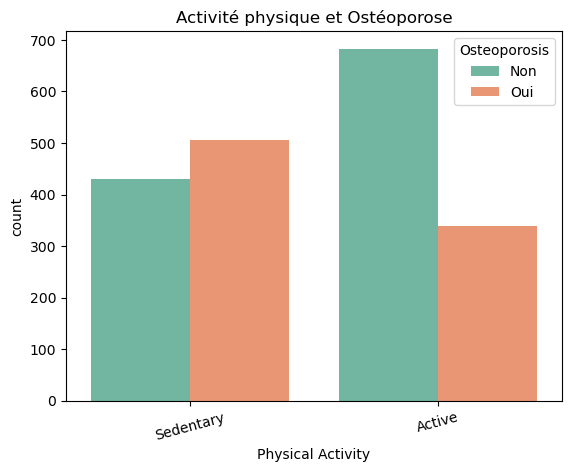

In [62]:
# 8. Activité physique vs Osteoporosis
sns.countplot(data=df, x="Physical Activity", hue="Osteoporosis", palette="Set2")
plt.title("Activité physique et Ostéoporose")
plt.xlabel("Physical Activity")
plt.xticks(rotation=15)
plt.legend(title="Osteoporosis", labels=["Non", "Oui"])
plt.show()

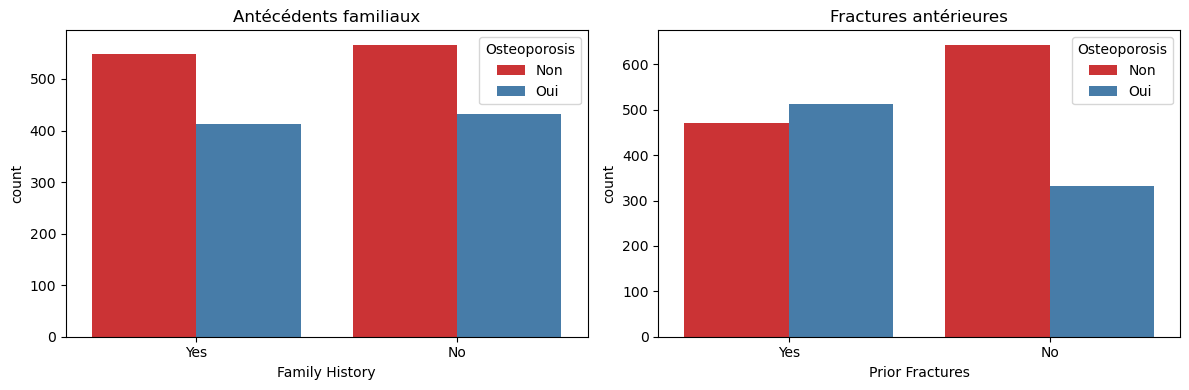

In [63]:
# 9. Antécédents familiaux et fractures antérieures vs Osteoporosis
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df, x="Family History", hue="Osteoporosis", ax=axes[0], palette="Set1")
axes[0].set_title("Antécédents familiaux")
axes[0].legend(title="Osteoporosis", labels=["Non", "Oui"])
sns.countplot(data=df, x="Prior Fractures", hue="Osteoporosis", ax=axes[1], palette="Set1")
axes[1].set_title("Fractures antérieures")
axes[1].legend(title="Osteoporosis", labels=["Non", "Oui"])
plt.tight_layout()
plt.show()

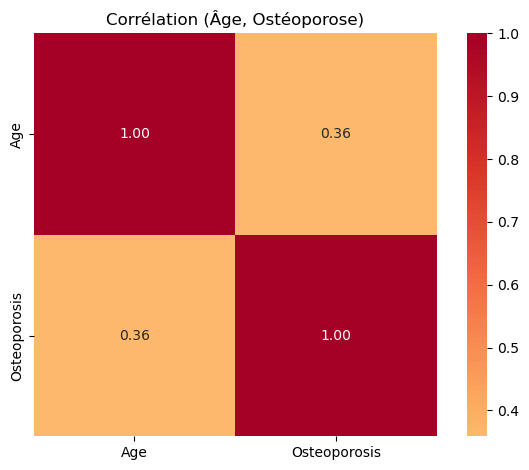

In [64]:
# 10. Matrice de corrélation (variables numériques)
num_cols = ["Age", "Osteoporosis"]
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="RdYlBu_r", center=0, fmt=".2f", square=True)
plt.title("Corrélation (Âge, Ostéoporose)")
plt.tight_layout()
plt.show()

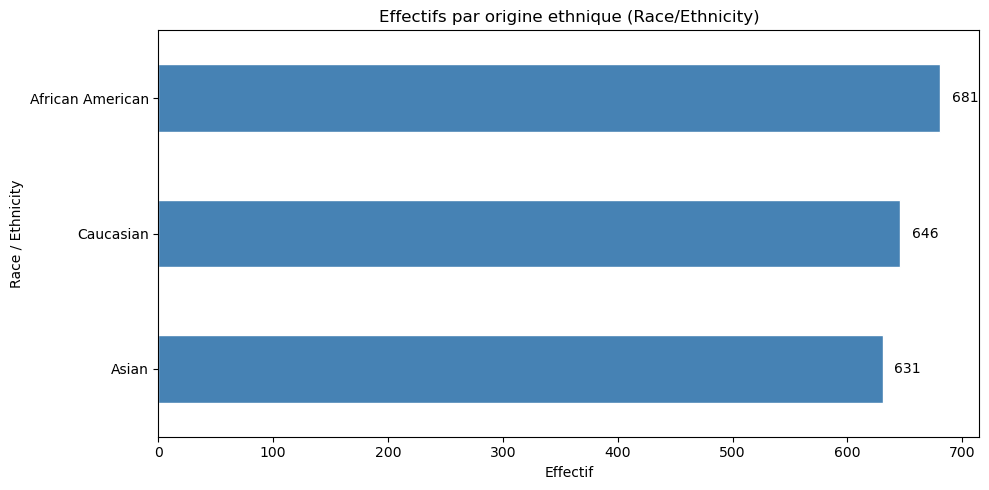

In [65]:
# Effectifs par race / origine ethnique
race_counts = df["Race/Ethnicity"].value_counts().sort_values(ascending=True)
plt.figure(figsize=(10, 5))
race_counts.plot(kind="barh", color="steelblue", edgecolor="white")
plt.title("Effectifs par origine ethnique (Race/Ethnicity)")
plt.xlabel("Effectif")
plt.ylabel("Race / Ethnicity")
for i, v in enumerate(race_counts):
    plt.text(v + 10, i, str(v), va="center", fontsize=10)
plt.tight_layout()
plt.show()

## Nettoyage des données — suppression des colonnes avec valeurs manquantes

In [66]:
# Colonnes contenant des NaN
cols_avec_nan = df.columns[df.isnull().any()].tolist()
print("Colonnes supprimées (contiennent des NaN) :", cols_avec_nan)

Colonnes supprimées (contiennent des NaN) : ['Alcohol Consumption', 'Medical Conditions', 'Medications']


In [67]:
# Suppression des colonnes avec valeurs manquantes
df = df.drop(columns=cols_avec_nan)
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,No,0
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,Yes,1


In [68]:
# Vérification : plus de NaN, nouvelle forme
print("Shape après nettoyage:", df.shape)
print("\nValeurs manquantes par colonne :")
df.isnull().sum()

Shape après nettoyage: (1958, 13)

Valeurs manquantes par colonne :


Id                   0
Age                  0
Gender               0
Hormonal Changes     0
Family History       0
Race/Ethnicity       0
Body Weight          0
Calcium Intake       0
Vitamin D Intake     0
Physical Activity    0
Smoking              0
Prior Fractures      0
Osteoporosis         0
dtype: int64

## Modèle — Étape 1 : Encodage des variables

In [69]:
from sklearn.preprocessing import LabelEncoder

# Exclure Id et cible pour les features
df_model = df.drop(columns=["Id"])

# Encodage des variables catégorielles (LabelEncoder colonne par colonne)
le_dict = {}
for col in df_model.select_dtypes(include=["object"]).columns:
    le_dict[col] = LabelEncoder()
    df_model[col] = le_dict[col].fit_transform(df_model[col].astype(str))

# Séparation X (features) et y (cible)
X = df_model.drop(columns=["Osteoporosis"])
y = df_model["Osteoporosis"]

print("Forme de X:", X.shape)
print("Forme de y:", y.shape)
X.head()

Forme de X: (1958, 11)
Forme de y: (1958,)


,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Prior Fractures
0,69,0,0,1,1,1,1,1,1,1,1
1,32,0,0,1,1,1,1,1,1,0,1
2,89,0,1,0,2,0,0,1,0,0,0
3,78,0,0,0,2,1,0,0,1,1,0
4,38,1,1,1,0,0,1,1,0,1,1


## Modèle — Étape 2 : Séparation train/test et mise à l'échelle

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparation train / test (80 % train, 20 % test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle (fit sur train uniquement, puis transform train et test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train:", X_train.shape, "| y_train:", y_train.shape)
print("X_test:", X_test.shape, "| y_test:", y_test.shape)

X_train: (1566, 11) | y_train: (1566,)
X_test: (392, 11) | y_test: (392,)


## Modèle — Étape 1 : Encodage des variables
Variables catégorielles transformées en numériques pour les algorithmes.

In [71]:
# Séparation features (X) et cible (y) — on retire l'Id (inutile pour la prédiction)
y = df["Osteoporosis"]
X = df.drop(columns=["Id", "Osteoporosis"])
print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()

X shape: (1958, 11)
y shape: (1958,)


,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Prior Fractures
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Yes
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,Yes
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,No
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,No
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,Yes


In [72]:
# Colonnes catégorielles à encoder
colonnes_cat = X.select_dtypes(include=["object"]).columns.tolist()
print("Colonnes catégorielles :", colonnes_cat)

Colonnes catégorielles : ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Prior Fractures']


In [73]:
# Encodage one-hot (get_dummies) : une colonne binaire par modalité
# drop_first=True pour éviter la colinéarité (utile pour régression logistique)
X_enc = pd.get_dummies(X, columns=colonnes_cat, drop_first=True)
print("Shape après encodage:", X_enc.shape)
X_enc.head()

Shape après encodage: (1958, 12)


,Age,Gender_Male,Hormonal Changes_Postmenopausal,Family History_Yes,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Body Weight_Underweight,Calcium Intake_Low,Vitamin D Intake_Sufficient,Physical Activity_Sedentary,Smoking_Yes,Prior Fractures_Yes
0,69,False,False,True,True,False,True,True,True,True,True,True
1,32,False,False,True,True,False,True,True,True,True,False,True
2,89,False,True,False,False,True,False,False,True,False,False,False
3,78,False,False,False,False,True,True,False,False,True,True,False
4,38,True,True,True,False,False,False,True,True,False,True,True


## Étape 2 : Mise à l'échelle (Standardisation)
Réduire les variables à même échelle pour que les algorithmes sensibles (ex. régression, SVM) ne soient pas dominés par une seule variable.

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_enc)
# On garde un DataFrame pour la lisibilité (optionnel)
X_scaled = pd.DataFrame(X_scaled, columns=X_enc.columns, index=X_enc.index)
print("Mise à l'échelle appliquée (moyenne ~0, std ~1). Shape:", X_scaled.shape)
X_scaled.head()

Mise à l'échelle appliquée (moyenne ~0, std ~1). Shape: (1958, 12)


,Age,Gender_Male,Hormonal Changes_Postmenopausal,Family History_Yes,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Body Weight_Underweight,Calcium Intake_Low,Vitamin D Intake_Sufficient,Physical Activity_Sedentary,Smoking_Yes,Prior Fractures_Yes
0,1.400418,-1.013368,-0.997959,1.019600,1.450176,-0.701697,1.050293,0.974782,0.967831,1.043862,0.996940,0.995923
1,-0.332606,-1.013368,-0.997959,1.019600,1.450176,-0.701697,1.050293,0.974782,0.967831,1.043862,-1.003069,0.995923
2,2.337187,-1.013368,1.002045,-0.980777,-0.689571,1.425117,-0.952115,-1.025871,0.967831,-0.957981,-1.003069,-1.004094
3,1.821964,-1.013368,-0.997959,-0.980777,-0.689571,1.425117,1.050293,-1.025871,-1.033239,1.043862,0.996940,-1.004094
4,-0.051575,0.986808,1.002045,1.019600,-0.689571,-0.701697,-0.952115,0.974782,0.967831,-0.957981,0.996940,0.995923


In [75]:
from sklearn.model_selection import train_test_split

# Séparation 80 % train, 20 % test (sur X_scaled et y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape, "| y_train:", y_train.shape)
print("X_test:", X_test.shape, "| y_test:", y_test.shape)

X_train: (1566, 12) | y_train: (1566,)
X_test: (392, 12) | y_test: (392,)


## Étape 4 : Sélection des caractéristiques
Garder les variables les plus informatives pour la cible (réduire le bruit et le temps de calcul).

In [76]:
from sklearn.feature_selection import SelectKBest, f_classif

# Garder les k meilleures variables (score F ANOVA)
k = 10
selector = SelectKBest(score_func=f_classif, k=min(k, X_train.shape[1]))
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

# Noms des variables sélectionnées (même source que X_train pour éviter décalage de taille)
noms_features = X_train.columns if hasattr(X_train, "columns") else pd.Index(range(X_train.shape[1]))
mask = selector.get_support()
features_selectionnees = noms_features[mask].tolist()
scores = selector.scores_[mask]

print("Variables sélectionnées (top", k, "):")
for nom, score in sorted(zip(features_selectionnees, scores), key=lambda x: -x[1]):
    print(f"  {nom}: {score:.2f}")
print("\nX_train_sel:", X_train_sel.shape, "| X_test_sel:", X_test_sel.shape)

Variables sélectionnées (top 10 ):
  Age: 251.20
  Body Weight_Underweight: 96.88
  Physical Activity_Sedentary: 72.79
  Calcium Intake_Low: 63.42
  Prior Fractures_Yes: 49.84
  Smoking_Yes: 4.02
  Race/Ethnicity_Asian: 1.19
  Gender_Male: 0.84
  Race/Ethnicity_Caucasian: 0.39
  Family History_Yes: 0.22

X_train_sel: (1566, 10) | X_test_sel: (392, 10)


### Visualisation : personnes > 40 ans **sans** ostéoporose (target = 0)
Vérifier que les données contiennent bien des cas « âgés sans ostéoporose », pour voir si le modèle n’est pas trop dominé par l’âge.

Personnes > 40 ans SANS ostéoporose (target=0): 215
Personnes > 40 ans AVEC ostéoporose (target=1): 461

Aperçu des > 40 ans sans ostéoporose (quelques lignes):


,Age,Gender,Body Weight,Physical Activity,Osteoporosis
2,89,Female,Normal,Active,0
16,50,Female,Underweight,Active,0
17,75,Male,Normal,Sedentary,0
20,76,Male,Normal,Sedentary,0
21,59,Female,Normal,Active,0
25,79,Male,Normal,Active,0
29,72,Male,Normal,Active,0
30,81,Male,Underweight,Active,0
42,70,Female,Normal,Active,0
45,88,Female,Normal,Active,0


C:\Users\DEBUZE DAVID\AppData\Local\Temp\ipykernel_7972\2130258850.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df["Age"] > 40], x="Osteoporosis", palette="Set2", ax=axes[0])
C:\Users\DEBUZE DAVID\AppData\Local\Temp\ipykernel_7972\2130258850.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Non (0)", "Oui (1)"])


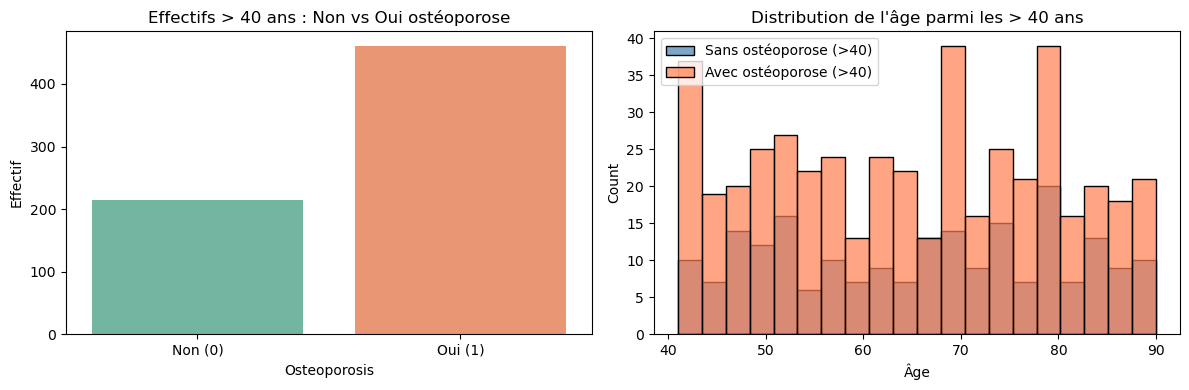

In [77]:
# Filtrer : Age > 40 et Osteoporosis = 0 (pas d'ostéoporose)
plus_40_sans = df[(df["Age"] > 40) & (df["Osteoporosis"] == 0)]
plus_40_avec = df[(df["Age"] > 40) & (df["Osteoporosis"] == 1)]

print("Personnes > 40 ans SANS ostéoporose (target=0):", len(plus_40_sans))
print("Personnes > 40 ans AVEC ostéoporose (target=1):", len(plus_40_avec))
print("\nAperçu des > 40 ans sans ostéoporose (quelques lignes):")
display(plus_40_sans[["Age", "Gender", "Body Weight", "Physical Activity", "Osteoporosis"]].head(10))

# Visualisation : répartition Ostéoporose parmi les > 40 ans
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df[df["Age"] > 40], x="Osteoporosis", palette="Set2", ax=axes[0])
axes[0].set_xticklabels(["Non (0)", "Oui (1)"])
axes[0].set_title("Effectifs > 40 ans : Non vs Oui ostéoporose")
axes[0].set_ylabel("Effectif")

# Distribution de l'âge pour les target=0 (sans ostéoporose) — montrer qu'il y en a au-delà de 40
sns.histplot(plus_40_sans["Age"], bins=20, color="steelblue", label="Sans ostéoporose (>40)", ax=axes[1], alpha=0.7)
sns.histplot(plus_40_avec["Age"], bins=20, color="coral", label="Avec ostéoporose (>40)", ax=axes[1], alpha=0.7)
axes[1].set_title("Distribution de l'âge parmi les > 40 ans")
axes[1].legend()
axes[1].set_xlabel("Âge")
plt.tight_layout()
plt.show()

C:\Users\DEBUZE DAVID\AppData\Local\Temp\ipykernel_7972\349780781.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, y="Variable", x="Score F", palette="viridis")


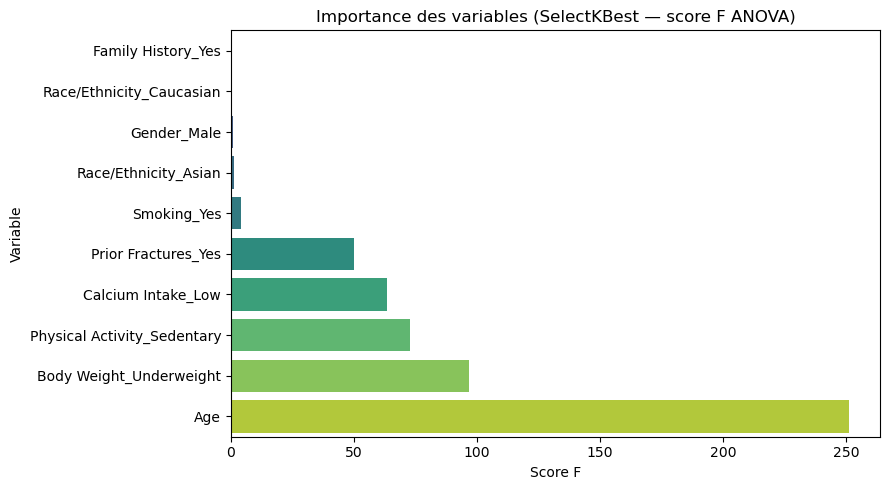

In [78]:
# Visualisation : importance des variables sélectionnées (Seaborn)
cols = getattr(X_scaled, "columns", None)
if cols is not None and len(features_selectionnees) <= len(cols):
    try:
        noms = [cols[int(f)] if isinstance(f, (int, np.integer)) else str(f) for f in features_selectionnees]
    except (ValueError, IndexError):
        noms = [str(f) for f in features_selectionnees]
else:
    noms = [str(f) for f in features_selectionnees]
plot_df = pd.DataFrame({"Variable": noms, "Score F": scores}).sort_values("Score F", ascending=True)
plt.figure(figsize=(9, 5))
sns.barplot(data=plot_df, y="Variable", x="Score F", palette="viridis")
plt.title("Importance des variables (SelectKBest — score F ANOVA)")
plt.xlabel("Score F")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

## Étape 5 : Gestion du déséquilibre des classes
Si une classe (Osteoporosis 0/1) est sous-représentée, on peut sur- ou sous-échantillonner pour équilibrer l'entraînement (ex. SMOTE). Ici les classes sont déjà équilibrées ; on applique tout de même une option réutilisable.

In [79]:
from imblearn.over_sampling import SMOTE

# Vérifier l'équilibre actuel
print("Répartition train avant équilibrage:", pd.Series(y_train).value_counts().to_dict())

# SMOTE sur les données d'entraînement sélectionnées (uniquement sur train)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_sel, y_train)

print("Répartition train après SMOTE:", pd.Series(y_train_bal).value_counts().to_dict())
print("X_train_bal:", X_train_bal.shape, "| y_train_bal:", y_train_bal.shape)

Répartition train avant équilibrage: {0: 886, 1: 680}
Répartition train après SMOTE: {1: 886, 0: 886}
X_train_bal: (1772, 10) | y_train_bal: (1772,)


## Étape 6 : Sélection des algorithmes candidats et entraînement
On entraîne plusieurs modèles (régression logistique, forêt aléatoire, etc.) et on compare leurs performances pour choisir les meilleurs.

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Algorithmes candidats
modeles = {
    "Arbre de décision": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Bayésienne": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42),
}

# Entraînement et score sur le jeu de test
resultats = []
for nom, modele in modeles.items():
    modele.fit(X_train_bal, y_train_bal)
    y_pred = modele.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)
    resultats.append({"Modèle": nom, "Accuracy (test)": round(acc, 4)})

pd.DataFrame(resultats)

,Modèle,Accuracy (test)
0,Arbre de décision,0.8061
1,SVM,0.8214
2,Bayésienne,0.7500
3,KNN,0.7168
4,XGBoost,0.8393


## Étape 7 : Validation croisée
Estimer la performance de chaque modèle de façon plus stable en faisant plusieurs découpes train/validation (ex. 5 folds).

In [82]:
from sklearn.model_selection import cross_val_score

# Validation croisée 5 folds sur les données d'entraînement équilibrées
cv_resultats = []
for nom, modele in modeles.items():
    scores = cross_val_score(modele, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
    cv_resultats.append({
        "Modèle": nom,
        "Accuracy (moy)": round(scores.mean(), 4),
        "Accuracy (std)": round(scores.std(), 4),
    })

pd.DataFrame(cv_resultats)

,Modèle,Accuracy (moy),Accuracy (std)
0,Arbre de décision,0.8381,0.0313
1,SVM,0.8093,0.0200
2,Bayésienne,0.7348,0.0202
3,KNN,0.7630,0.0248
4,XGBoost,0.8629,0.0168


## Étape 8 : Optimisation des hyperparamètres
Recherche des meilleures valeurs des hyperparamètres (ex. profondeur, nombre d’arbres) pour le meilleur modèle (XGBoost) via une grille de recherche.

In [83]:
from sklearn.model_selection import GridSearchCV

# Grille d'hyperparamètres pour XGBoost (modèle le plus performant en CV)
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
}

grid = GridSearchCV(
    XGBClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=0,
)
grid.fit(X_train_bal, y_train_bal)

print("Meilleurs hyperparamètres:", grid.best_params_)
print("Meilleur score (CV):", round(grid.best_score_, 4))
modele_final = grid.best_estimator_

Meilleurs hyperparamètres: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Meilleur score (CV): 0.8866


## Étape 9 : Évaluation finale
Performance du modèle retenu (XGBoost optimisé) sur le jeu de test : accuracy, rapport de classification, matrice de confusion.

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

# Prédictions sur le jeu de test
y_pred_final = modele_final.predict(X_test_sel)

# Accuracy
print("Accuracy (test):", round(accuracy_score(y_test, y_pred_final), 4))

# Rapport de classification (précision, rappel, F1 par classe)
print("\nRapport de classification:\n", classification_report(y_test, y_pred_final, target_names=["Non", "Oui"]))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_final)
print("Matrice de confusion:\n", cm)

Accuracy (test): 0.8852

Rapport de classification:
               precision    recall  f1-score   support

         Non       0.85      0.98      0.91       228
         Oui       0.96      0.76      0.85       164

    accuracy                           0.89       392
   macro avg       0.90      0.87      0.88       392
weighted avg       0.90      0.89      0.88       392

Matrice de confusion:
 [[223   5]
 [ 40 124]]


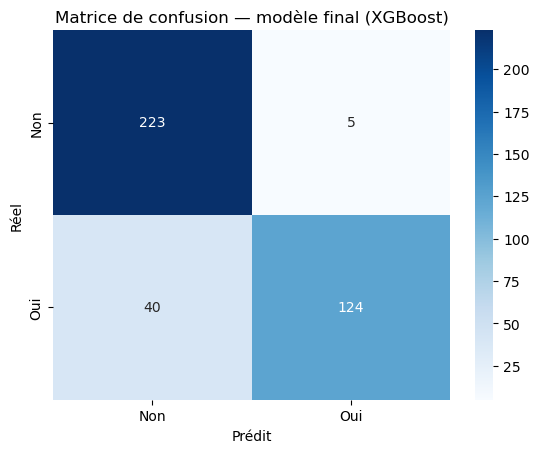

In [99]:
# Visualisation de la matrice de confusion (Seaborn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non", "Oui"], yticklabels=["Non", "Oui"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion — modèle final (XGBoost)")
plt.show()

## Test de prédiction — un nouveau patient
Modifie les valeurs du dictionnaire `patient` ci-dessous puis exécute la cellule pour obtenir une prédiction (Ostéoporose : Oui / Non).

In [102]:
# Valeurs du patient à tester (modifie ici)
# Age: nombre (ex. 25 à 90)
# Gender: "Female" ou "Male"
# Hormonal Changes: "Normal" ou "Postmenopausal"
# Family History: "Yes" ou "No"
# Race/Ethnicity: "Asian", "Caucasian", "African American", "Hispanic", "Other"
# Body Weight: "Underweight", "Normal", "Overweight"
# Calcium Intake: "Low" ou "Adequate"
# Vitamin D Intake: "Sufficient" ou "Insufficient"
# Physical Activity: "Sedentary" ou "Active"
# Smoking: "Yes" ou "No"
# Prior Fractures: "Yes" ou "No"

patient = {
    "Age": 35,
    "Gender": "Female",
    "Hormonal Changes": "Postmenopausal",
    "Family History": "no",
    "Race/Ethnicity": "asian",
    "Body Weight": "normal",
    "Calcium Intake": "Adequate",
    "Vitamin D Intake": "Insufficient",
    "Physical Activity": "active",
    "Smoking": "No",
    "Prior Fractures": "NO",
}

# Une ligne DataFrame (même colonnes que X)
patient_df = pd.DataFrame([patient])

# Même encodage que l'entraînement (get_dummies)
patient_enc = pd.get_dummies(patient_df, columns=colonnes_cat, drop_first=True)
patient_enc = patient_enc.reindex(columns=X_enc.columns, fill_value=0)

# Même mise à l'échelle et sélection de variables
patient_scaled = scaler.transform(patient_enc)
# Aligner le nombre de variables sur ce que le sélecteur a vu à l'entraînement (évite 12 vs 11)
n_attendu = selector.n_features_in_
if patient_scaled.shape[1] != n_attendu:
    patient_scaled = patient_scaled[:, :n_attendu]
patient_sel = selector.transform(patient_scaled)

# Prédiction
pred = modele_final.predict(patient_sel)[0]
resultat = "Oui" if pred == 1 else "Non"
print("Patient testé:", patient)
print("\nPrédiction — Ostéoporose:", resultat)

Patient testé: {'Age': 35, 'Gender': 'Female', 'Hormonal Changes': 'Postmenopausal', 'Family History': 'no', 'Race/Ethnicity': 'asian', 'Body Weight': 'normal', 'Calcium Intake': 'Adequate', 'Vitamin D Intake': 'Insufficient', 'Physical Activity': 'active', 'Smoking': 'No', 'Prior Fractures': 'NO'}

Prédiction — Ostéoporose: Non


C:\Users\DEBUZE DAVID\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


## Étape 1 — Export du modèle (pour Render / API)
Sauvegarde du modèle, du scaler, du sélecteur et de la config dans `model-service/models/`.

In [145]:
import os
import json
import joblib  # pip install joblib (mieux que pickle pour sklearn)

# Dossier de sauvegarde (même structure que pour le service Render)
MODEL_DIR = "model-service/models"
os.makedirs(MODEL_DIR, exist_ok=True)

# Sauvegarde du modèle, du scaler et du sélecteur (joblib pour sklearn)
joblib.dump(modele_final, os.path.join(MODEL_DIR, "model.joblib"))
joblib.dump(scaler, os.path.join(MODEL_DIR, "scaler.joblib"))
joblib.dump(selector, os.path.join(MODEL_DIR, "selector.joblib"))

# Config pour l'API (colonnes attendues, etc.)
config = {
    "colonnes_cat": colonnes_cat,
    "columns_encoded": X_enc.columns.tolist(),
    "n_features_in": int(selector.n_features_in_),
}
with open(os.path.join(MODEL_DIR, "config.json"), "w", encoding="utf-8") as f:
    json.dump(config, f, indent=2, ensure_ascii=False)

print("Sauvegardé dans", os.path.abspath(MODEL_DIR))
print("Fichiers:", os.listdir(MODEL_DIR))

Sauvegardé dans C:\Users\DEBUZE DAVID\Documents\aaMes cours\L4\Premier semestre\Systeme intelligent\Tp\model-service\models
Fichiers: ['.gitkeep', 'config.json', 'model.joblib', 'scaler.joblib', 'selector.joblib']


### Test plusieurs âges (même profil favorable)
On teste les âges 31, 35, 40 avec le même profil pour voir à partir de quel âge le modèle bascule en « Oui » ou « Non ».

In [103]:
# Profil favorable fixe (seul l'âge varie)
profil_base = {
    "Gender": "Female",
    "Hormonal Changes": "Normal",
    "Family History": "No",
    "Race/Ethnicity": "Caucasian",
    "Body Weight": "Normal",
    "Calcium Intake": "Adequate",
    "Vitamin D Intake": "Sufficient",
    "Physical Activity": "Active",
    "Smoking": "No",
    "Prior Fractures": "No",
}

ages_test = [31, 35, 40,28, 20, 50, 33]
print("Profil : Normal, Active, Adequate, No fractures, No smoking, etc.\n")
print("Âge  →  Prédiction")
print("-" * 25)

for age in ages_test:
    patient = {"Age": age, **profil_base}
    patient_df = pd.DataFrame([patient])
    patient_enc = pd.get_dummies(patient_df, columns=colonnes_cat, drop_first=True)
    patient_enc = patient_enc.reindex(columns=X_enc.columns, fill_value=0)
    patient_scaled = scaler.transform(patient_enc)
    n_attendu = selector.n_features_in_
    if patient_scaled.shape[1] != n_attendu:
        patient_scaled = patient_scaled[:, :n_attendu]
    patient_sel = selector.transform(patient_scaled)
    pred = modele_final.predict(patient_sel)[0]
    resultat = "Oui" if pred == 1 else "Non"
    print(f"  {age}   →  {resultat}")

Profil : Normal, Active, Adequate, No fractures, No smoking, etc.

Âge  →  Prédiction
-------------------------
  31   →  Oui
  35   →  Non
  40   →  Oui
  28   →  Oui
  20   →  Non
  50   →  Non
  33   →  Oui


C:\Users\DEBUZE DAVID\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
C:\Users\DEBUZE DAVID\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
C:\Users\DEBUZE DAVID\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
C:\Users\DEBUZE DAVID\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
C:\Users\DEBUZE DAVID\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Sele